In [ ]:
#importing python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Reading the Email and sms datasets
e=pd.read_csv('/content/mail_data.csv')
s=pd.read_csv('/content/SMSCollection.csv')

In [ ]:
#Sample records of Email datasset
e.sample(5)


,Category,Message
3349,ham,"Sorry, I'll call later"
2175,ham,See? I thought it all through
1212,ham,Ok then i will come to ur home after half an hour
3166,ham,Cheers for the card ... Is it that time of yea...
1927,ham,Dont give a monkeys wot they think and i certa...


In [ ]:
#Sample record of SMS dataset
s.sample(5)

,Class,sms
943,spam,How about getting in touch with folks waiting ...
2398,ham,Neshanth..tel me who r u?
2400,ham,Oh... Kay... On sat right?
1319,ham,Ok...
186,ham,Hello handsome ! Are you finding that job ? No...


In [ ]:
s.describe()

,Class,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
e.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
e.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Class   5572 non-null   object
 1   sms     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
#Renaming of Columns

In [ ]:
e.rename(columns={'Category':'target','Message':'text'},inplace=True)


**here we rename the column names as Category with target and Message with text**

In [ ]:
s.rename(columns={'Class':'target','sms':'text'},inplace=True)

**here we rename the column names as Class with target and sms with text**

In [ ]:
e.sample(5)

,target,text
3475,ham,", how's things? Just a quick question."
4182,ham,"Ok da, i already planned. I wil pick you."
3238,ham,Ron say fri leh. N he said ding tai feng cant ...
4075,ham,A lot of this sickness thing going round. Take...
5525,ham,I want to tell you how bad I feel that basical...


In [ ]:
s.sample(5)

,target,text
205,ham,U call me alter at 11 ok.
4297,spam,Please CALL 08712402578 immediately as there i...
2681,ham,Solve d Case : A Man Was Found Murdered On &l...
4880,ham,Yeah just open chat and click friend lists. Th...
4375,ham,K and you're sure I don't have to have consent...


# Conversion of categorical Values into numeric values of target attribute

In [ ]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()

**As this is a classification problem we want the “target" to be binary classified i.e, 0 or 1 so for this purpose we use label encoder ** **bold text**


In [ ]:
s['target']=encode.fit_transform(s['target'])

In [ ]:
e['target']=encode.fit_transform(e['target'])

In [ ]:
s.sample(5)

,target,text
3343,0,You will go to walmart. I.ll stay.
802,0,Appt is at &lt;TIME&gt; am. Not my fault u don...
4891,0,Sounds like there could be a lot of time spent...
3552,0,I love you both too :-)
3959,0,So i could kiss and feel you next to me...


In [ ]:
e.sample(5)

,target,text
3044,0,Your bill at 3 is £33.65 so thats not bad!
572,0,Do you know where my lab goggles went
923,0,It shall be fine. I have avalarr now. Will hol...
3618,0,Sorry sent blank msg again. Yup but trying 2 d...
3820,0,"sorry brah, just finished the last of my exams..."


# **shape of each dataset**

In [ ]:
display(s.shape,e.shape)

(5572, 2)

(5572, 2)

## **Merging of datasets**

In [ ]:
merged=pd.concat([s,e])
merged.shape


(11144, 2)

**here the merged dataset contains 11144 rows and 2 coloumns**

In [ ]:
merged.sample(10)

,target,text
576,1,"You have won ?1,000 cash or a ?2,000 prize! To..."
139,1,You'll not rcv any more msgs from the chat svc...
857,0,Going to take your babe out ?
2746,0,R ü going 4 today's meeting?
4547,0,Never try alone to take the weight of a tear t...
4908,0,Then anything special?
5182,0,I sent them. Do you like?
1218,0,"Damn, can you make it tonight or do you want t..."
2085,0,How are you. Wish you a great semester
4369,0,1 I don't have her number and 2 its gonna be a...


In [ ]:
merged.isnull().sum()

target    0
text      0
dtype: int64

***no null values**

# Finding duplicate values

In [ ]:
merged.duplicated().sum()

5796

***merged dataset shows 5796 duplicate values**

In [ ]:
d=merged.duplicated()
d

0       False
1       False
2       False
3       False
4       False
        ...  
5567     True
5568     True
5569     True
5570     True
5571     True
Length: 11144, dtype: bool

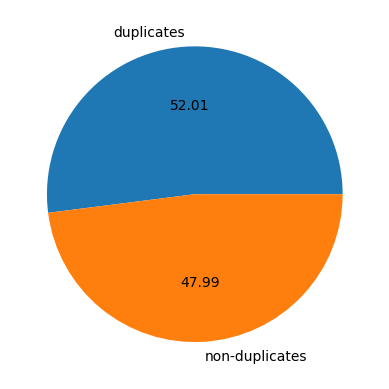

In [ ]:
plt.pie(d.value_counts(),labels=['duplicates','non-duplicates'],autopct="%0.2f")
plt.show()

***there are more no of duplicates**

# Removing duplicates from merged dataset

In [ ]:
merged=merged.drop_duplicates(keep='first')

In [ ]:
merged.duplicated().sum()

0

***by dropping all the duplicates ,merged dataset has no duplicate values.**

In [ ]:
merged.shape

(5348, 2)

# EDA(Exploratory Data Analysis)

---



In [ ]:
merged.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# To get a count of spam and ham messages and emails

In [ ]:
merged['target'].value_counts()

0    4674
1     674
Name: target, dtype: int64

<Axes: xlabel='target', ylabel='Count'>

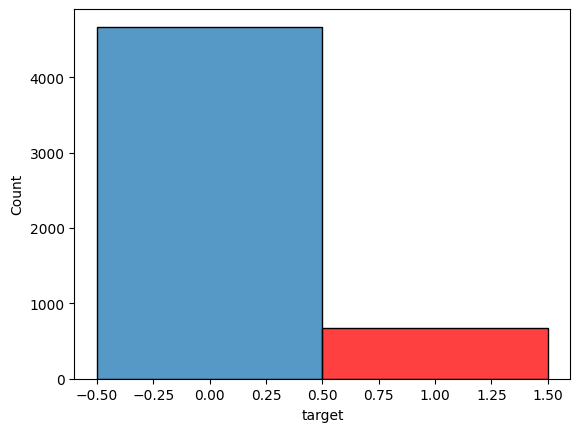

In [ ]:

sns.histplot(merged[merged['target']==0]['target'])
sns.histplot(merged[merged['target']==1]['target'],color='red')

***data is imbalanced**

In [ ]:
#Natural Language ToolKit contains textprocessing libraries

In [ ]:
import nltk

In [ ]:
#Installing nltk
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#punkt s used to train unlabeled data
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#num_characters counts characters of text
merged['num_characters']=merged['text'].apply(len)

In [ ]:
merged.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
#num_words counts words of text
merged['num_words']=merged['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
merged.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
#num_sentences counts sentences of the text
merged['num_sentences']=merged['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
merged.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
merged[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5348.000000,5348.000000,5348.000000
mean,79.621167,18.664174,1.977375
std,58.113737,13.321666,1.449368
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,62.000000,15.000000,2.000000
75%,119.000000,27.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
merged[merged['target']==0][['num_characters','num_words','num_sentences']].describe()
#description for ham messages

,num_characters,num_words,num_sentences
count,4674.000000,4674.000000,4674.000000
mean,71.225503,17.357510,1.834189
std,56.356031,13.509186,1.386284
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
merged[merged['target']==1][['num_characters','num_words','num_sentences']].describe()
#description for spam mesagges

,num_characters,num_words,num_sentences
count,674.000000,674.000000,674.000000
mean,137.842730,27.725519,2.970326
std,29.916062,6.979084,1.488643
min,7.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,148.500000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


# HISTPLOTS


<Axes: xlabel='num_characters', ylabel='Count'>

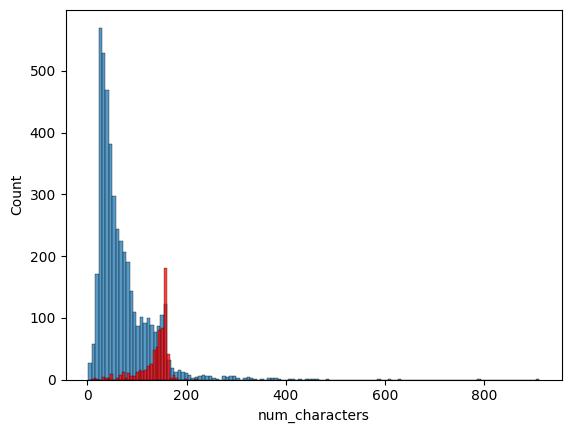

In [ ]:
sns.histplot(merged[merged['target']==0]['num_characters'])
sns.histplot(merged[merged['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

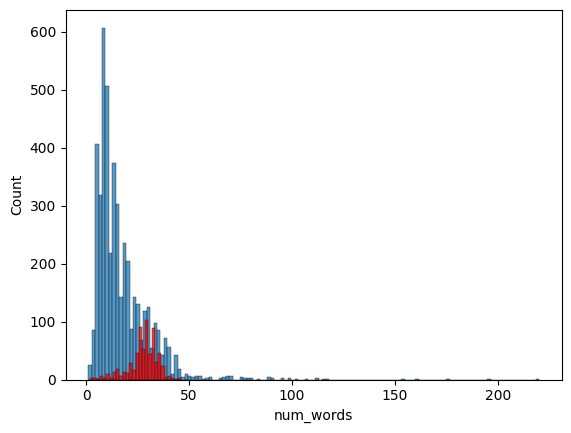

In [ ]:
sns.histplot(merged[merged['target']==0]['num_words'])
sns.histplot(merged[merged['target']==1]['num_words'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

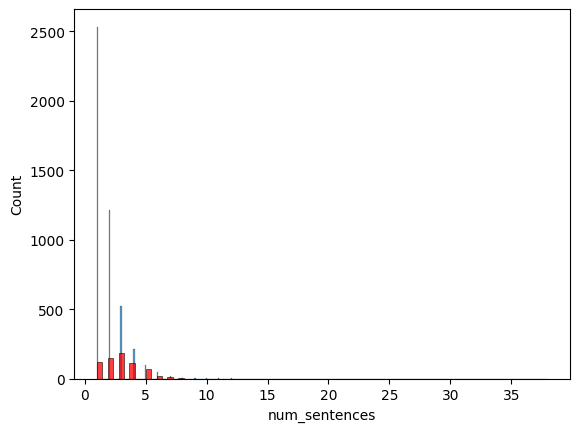

In [ ]:
sns.histplot(merged[merged['target']==0]['num_sentences'])
sns.histplot(merged[merged['target']==1]['num_sentences'],color='red')

# **PAIRPLOTS**

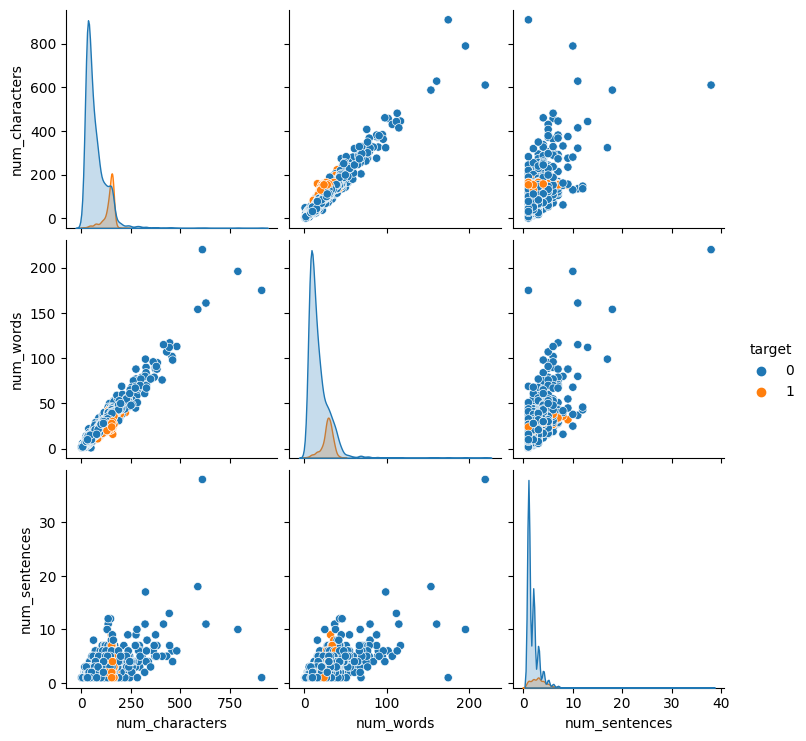

In [ ]:
sns.pairplot(merged,hue='target')

# **HEATMAP**

<ipython-input-49-fd5350f169db>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merged.corr(),annot=True)


<Axes: >

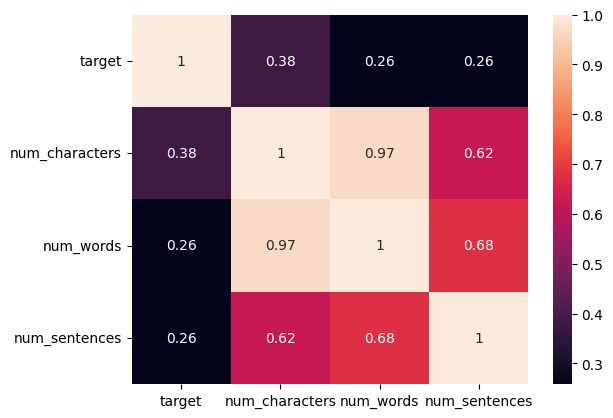

In [ ]:
sns.heatmap(merged.corr(),annot=True)

***positive correlation ->   num_words,num_characters
           negative correlation ->  num_sentences,target normal correlation   ->  num_characters,num_sentences**

# **PREPROCESSING**


#LOWERCASE

In [ ]:
def transform_text(text):
  text=text.lower()

  return text

In [ ]:
transform_text('ml project')

'ml project'

# TOKENIZATION

In [ ]:
def transform_text(text):
  text=nltk.word_tokenize(text)
  return text

In [ ]:
transform_text('ml project')

['ml', 'project']

#REMOVING SPECIAL CHARACTERS

In [ ]:
def transform_text(text):
  text=nltk.word_tokenize(text)
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
  return y

In [ ]:
transform_text('ml projrct @ spam or ham')

['ml', 'projrct', 'spam', 'or', 'ham']

#REMOVING STOPWORDS AND PUNCTUATION

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def transform_text(text):
  text=nltk.word_tokenize(text)
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
  text=y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  return y

In [ ]:
transform_text('ml project @ spam or ham')

['ml', 'project', 'spam', 'ham']

#STEMMING

In [ ]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('doing')

'do'

In [ ]:
def transform_text(text):
  text=nltk.word_tokenize(text)
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
  text=y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  text=y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [ ]:
transform_text('I loved doing projects on Machine Learning.How about you?')

'i love project machin'

In [ ]:
merged['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

#PREPROCESSING MERGED DATA

In [ ]:
merged['transformed_text']=merged['text'].apply(transform_text)

In [ ]:
merged.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i think goe usf live around though


# **WORD CLOUD**
# To visualize most prominent words in the text

In [ ]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
spam_wc=wc.generate(merged[merged['target']==1]['transformed_text'].str.cat(sep=" "))

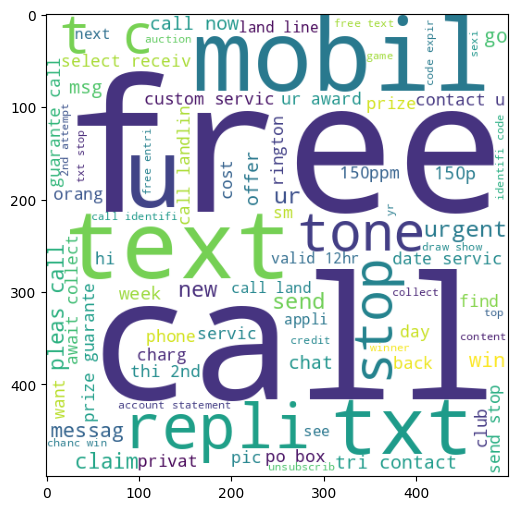

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

**Most repeated words in spam are free,call**

In [ ]:
ham_wc=wc.generate(merged[merged['target']==0]['transformed_text'].str.cat(sep=" "))

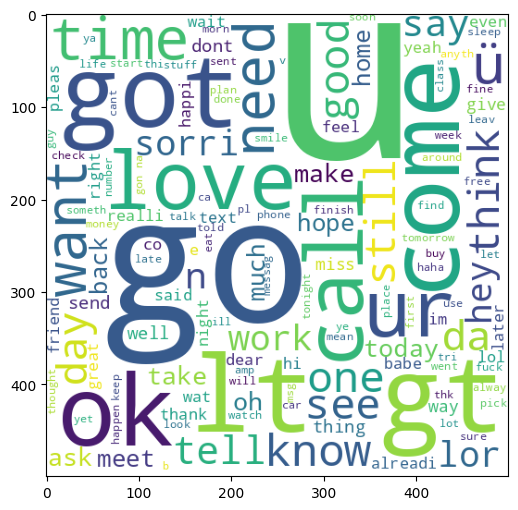

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

**most repeated words in ham are come,got**

In [ ]:
merged.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i think goe usf live around though


In [ ]:
merged_corpus=[]
for msg in merged[merged['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    merged_corpus.append(word)

In [ ]:
len(merged_corpus)

11246

In [ ]:
merged.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i think goe usf live around though


# **MODEL BUILDING**

In [ ]:
#importing required features
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfdif=TfidfVectorizer(max_features=3000)

In [ ]:
X=cv.fit_transform(merged['transformed_text']).toarray()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
s=MinMaxScaler()
X=s.fit_transform(X)

In [ ]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y=merged['target'].values

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#splitting data for testing and training
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
#to measure the performance of the matrices
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [ ]:
#Using different algorithms for model training and for also improving the performance
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnv=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs={
    'SVC':svc,
    'KN':knc,
    'NB':mnv,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'Bgc':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)
  accuracy=accuracy_score(y_test,y_pred)
  precision=precision_score(y_test,y_pred)
  recall=recall_score(y_test,y_pred)
  f1=f1_score(y_test,y_pred)

  return accuracy,precision,recall,f1

In [ ]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9682242990654205,
 0.9666666666666667,
 0.7945205479452054,
 0.8721804511278196)

In [ ]:
accuracy_scores=[]
precision_scores=[]
recall_scores=[]
f1_scores=[]

for name,clf in clfs.items():
  current_accuracy,current_precision,current_recall,current_f1=train_classifier(clf,X_train,y_train,X_test,y_test)
  print("For ",name)
  print("Accuracy- ",current_accuracy)
  print("Precision-",current_precision)
  print("Recall-",current_recall)
  print("F1-score -",current_f1)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)
  recall_scores.append(current_recall)
  f1_scores.append(current_f1)

For  SVC
Accuracy-  0.9682242990654205
Precision- 0.9666666666666667
Recall- 0.7945205479452054
F1-score - 0.8721804511278196
For  KN
Accuracy-  0.8953271028037383
Precision- 1.0
Recall- 0.2328767123287671
F1-score - 0.37777777777777777
For  NB
Accuracy-  0.9710280373831776
Precision- 0.9389312977099237
Recall- 0.8424657534246576
F1-score - 0.888086642599278
For  DT
Accuracy-  0.9214953271028037
Precision- 0.9696969696969697
Recall- 0.4383561643835616
F1-score - 0.6037735849056604
For  LR
Accuracy-  0.9635514018691589
Precision- 0.9908256880733946
Recall- 0.7397260273972602
F1-score - 0.8470588235294118
For  RF
Accuracy-  0.9616822429906542
Precision- 1.0
Recall- 0.7191780821917808
F1-score - 0.8366533864541833
For  AdaBoost
Accuracy-  0.9542056074766355
Precision- 0.9292035398230089
Recall- 0.7191780821917808
F1-score - 0.8108108108108109
For  Bgc
Accuracy-  0.9588785046728971
Precision- 0.9722222222222222
Recall- 0.7191780821917808
F1-score - 0.826771653543307


In [ ]:
performance_merged=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores,'Recall':recall_scores,'F1-Score':f1_scores}).sort_values('Precision',ascending=False)

In [ ]:
performance_merged

,Algorithm,Accuracy,Precision,Recall,F1-Score
1,KN,0.895327,1.000000,0.232877,0.377778
5,RF,0.961682,1.000000,0.719178,0.836653
9,GBDT,0.933645,1.000000,0.513699,0.678733
8,ETC,0.965421,0.990991,0.753425,0.856031
4,LR,0.963551,0.990826,0.739726,0.847059
10,xgb,0.963551,0.990826,0.739726,0.847059
7,Bgc,0.958879,0.972222,0.719178,0.826772
3,DT,0.921495,0.969697,0.438356,0.603774
0,SVC,0.968224,0.966667,0.794521,0.872180
2,NB,0.971028,0.938931,0.842466,0.888087


**performance evalution of all algorithms**

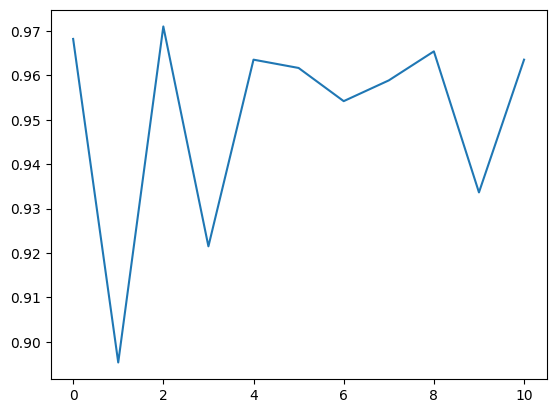

In [ ]:
plt.plot(accuracy_scores)

**From the above graph it shows accuracy,precision,f1,recall values ae highest in NaiveBayes**

<Figure size 1000x800 with 0 Axes>

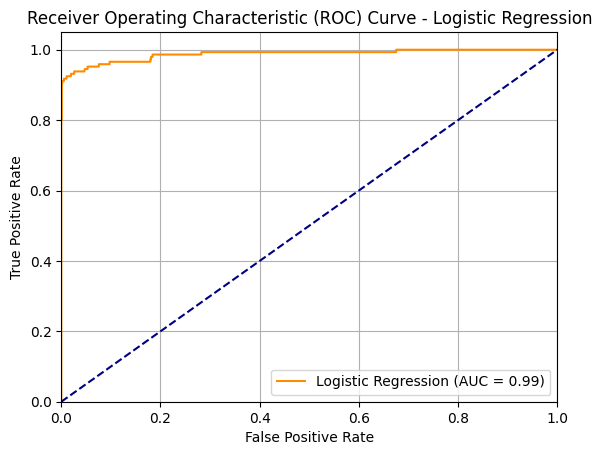

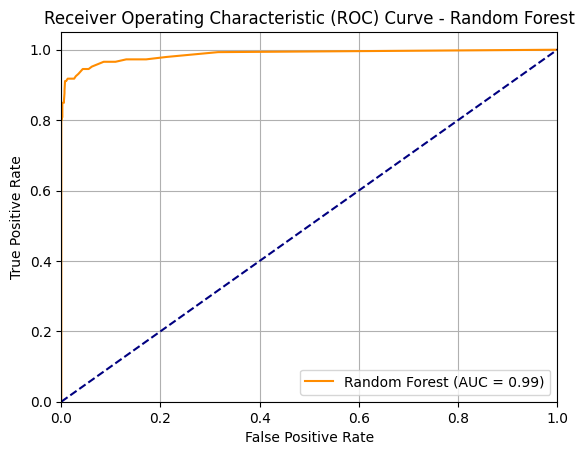

In [ ]:
from sklearn.metrics import roc_curve, auc

classifiers = {
    "Logistic Regression": LogisticRegression(),
     "Random Forest": RandomForestClassifier(),

}

plt.figure(figsize=(10, 8))

for clf_name, classifier in classifiers.items():

    classifier.fit(X_train, y_train)


    y_prob = classifier.predict_proba(X_test)[:, 1]


    fpr, tpr, _ = roc_curve(y_test, y_prob)

    auc_score = auc(fpr, tpr)


    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', label=f"{clf_name} (AUC = {auc_score:.2f})")
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {clf_name}')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

<Figure size 1000x800 with 0 Axes>

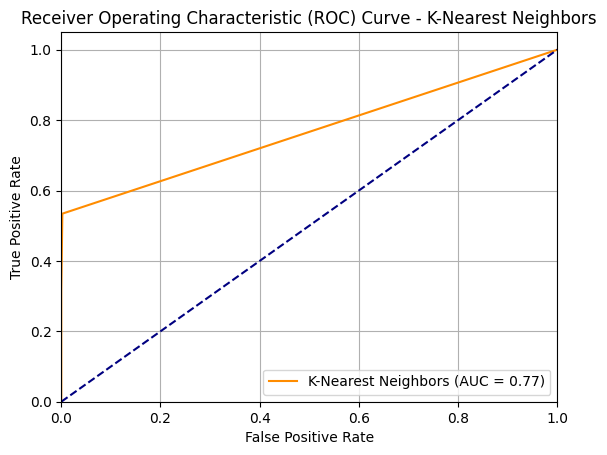

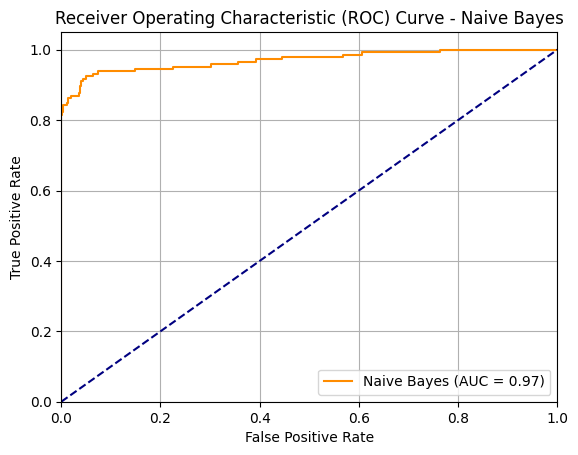

In [ ]:
from sklearn.metrics import roc_curve, auc

classifiers = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
     "Naive Bayes": MultinomialNB(),


}

plt.figure(figsize=(10, 8))

for clf_name, classifier in classifiers.items():

    classifier.fit(X_train, y_train)


    y_prob = classifier.predict_proba(X_test)[:, 1]


    fpr, tpr, _ = roc_curve(y_test, y_prob)

    auc_score = auc(fpr, tpr)


    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', label=f"{clf_name} (AUC = {auc_score:.2f})")
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {clf_name}')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

<Figure size 1000x800 with 0 Axes>

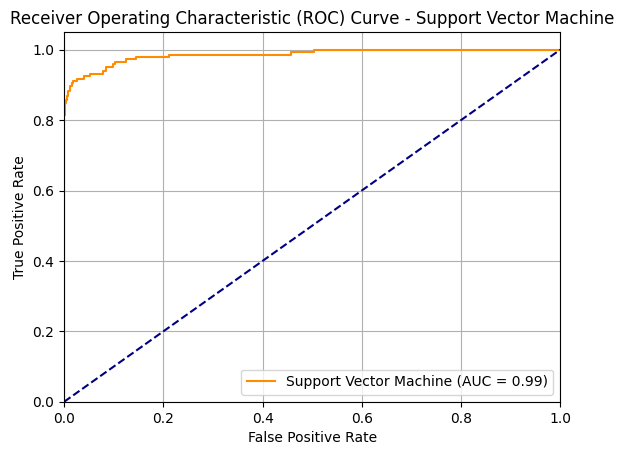

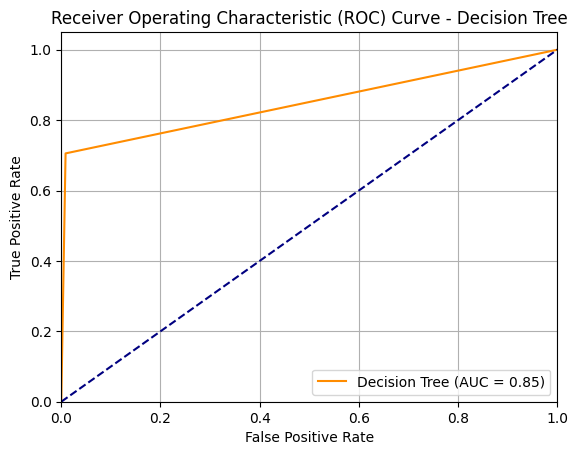

In [ ]:
from sklearn.metrics import roc_curve, auc

classifiers = {
    "Support Vector Machine": SVC(probability=True),
     "Decision Tree": DecisionTreeClassifier(),


}

plt.figure(figsize=(10, 8))

for clf_name, classifier in classifiers.items():

    classifier.fit(X_train, y_train)


    y_prob = classifier.predict_proba(X_test)[:, 1]


    fpr, tpr, _ = roc_curve(y_test, y_prob)

    auc_score = auc(fpr, tpr)


    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', label=f"{clf_name} (AUC = {auc_score:.2f})")
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {clf_name}')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

<Figure size 1000x800 with 0 Axes>

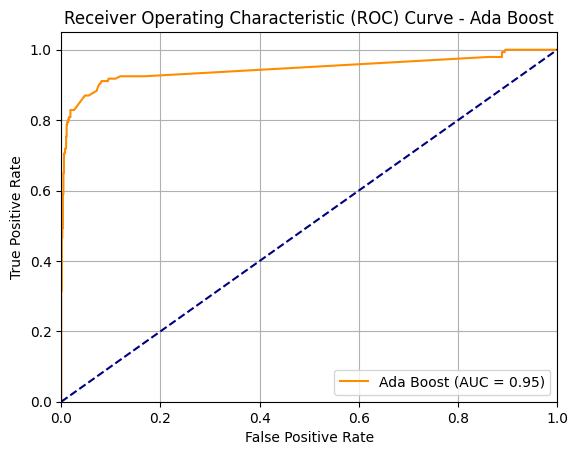

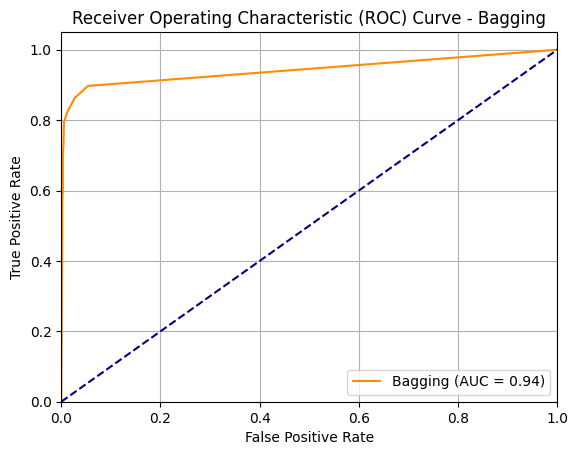

In [ ]:
from sklearn.metrics import roc_curve, auc

classifiers = {
    "Ada Boost": AdaBoostClassifier(),
     "Bagging":BaggingClassifier(),


}

plt.figure(figsize=(10, 8))

for clf_name, classifier in classifiers.items():

    classifier.fit(X_train, y_train)


    y_prob = classifier.predict_proba(X_test)[:, 1]


    fpr, tpr, _ = roc_curve(y_test, y_prob)

    auc_score = auc(fpr, tpr)


    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', label=f"{clf_name} (AUC = {auc_score:.2f})")
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {clf_name}')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

<Figure size 1000x800 with 0 Axes>

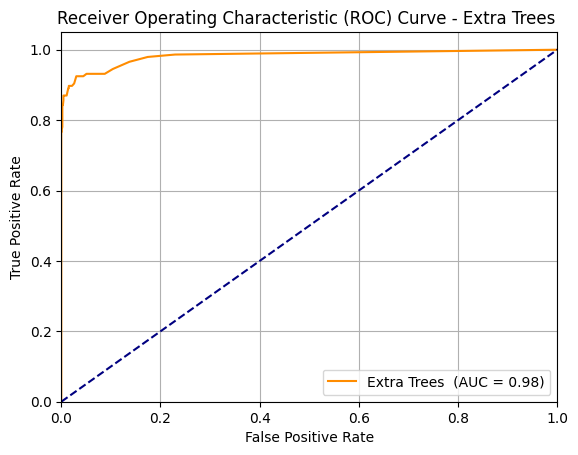

In [ ]:
from sklearn.metrics import roc_curve, auc

classifiers = {
    "Extra Trees ":ExtraTreesClassifier()


}

plt.figure(figsize=(10, 8))

for clf_name, classifier in classifiers.items():

    classifier.fit(X_train, y_train)


    y_prob = classifier.predict_proba(X_test)[:, 1]


    fpr, tpr, _ = roc_curve(y_test, y_prob)

    auc_score = auc(fpr, tpr)


    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', label=f"{clf_name} (AUC = {auc_score:.2f})")
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {clf_name}')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

<Figure size 1000x800 with 0 Axes>

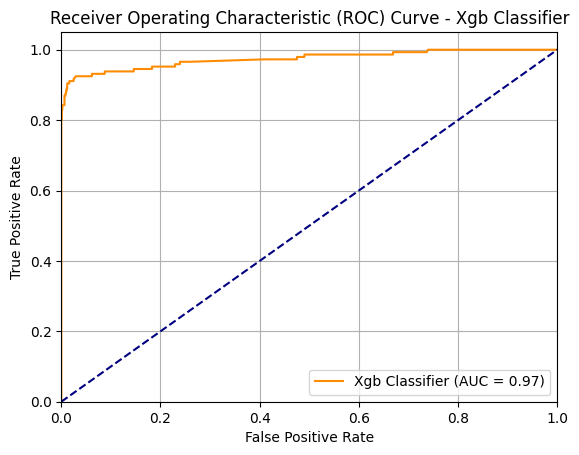

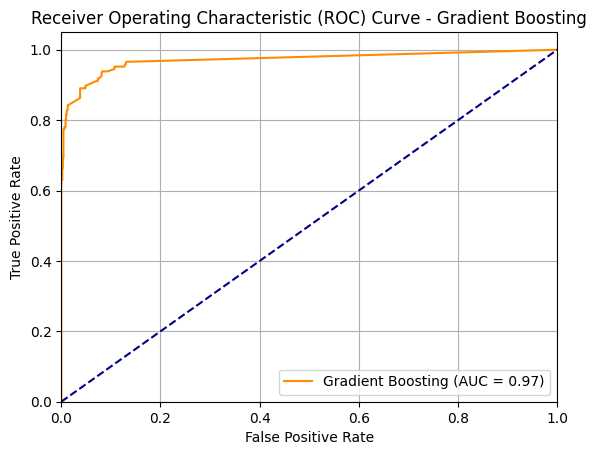

In [ ]:
from sklearn.metrics import roc_curve, auc

classifiers = {
    "Xgb Classifier": XGBClassifier(),
     "Gradient Boosting": GradientBoostingClassifier(),


}

plt.figure(figsize=(10, 8))

for clf_name, classifier in classifiers.items():

    classifier.fit(X_train, y_train)


    y_prob = classifier.predict_proba(X_test)[:, 1]


    fpr, tpr, _ = roc_curve(y_test, y_prob)

    auc_score = auc(fpr, tpr)


    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', label=f"{clf_name} (AUC = {auc_score:.2f})")
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {clf_name}')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

In [ ]:
from sklearn.metrics import roc_curve


classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_prob = classifier.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

for f, t, th in zip(fpr, tpr, thresholds):
    print(f"False Positive Rate: {f:.4f} | True Positive Rate: {t:.4f} | Threshold: {th:.4f}")

False Positive Rate: 0.0000 | True Positive Rate: 0.0000 | Threshold: 1.9991
False Positive Rate: 0.0000 | True Positive Rate: 0.0068 | Threshold: 0.9991
False Positive Rate: 0.0000 | True Positive Rate: 0.2534 | Threshold: 0.9645
False Positive Rate: 0.0000 | True Positive Rate: 0.2671 | Threshold: 0.9638
False Positive Rate: 0.0000 | True Positive Rate: 0.3493 | Threshold: 0.9433
False Positive Rate: 0.0000 | True Positive Rate: 0.3630 | Threshold: 0.9429
False Positive Rate: 0.0000 | True Positive Rate: 0.7329 | Threshold: 0.4895
False Positive Rate: 0.0000 | True Positive Rate: 0.7466 | Threshold: 0.4723
False Positive Rate: 0.0000 | True Positive Rate: 0.7808 | Threshold: 0.3955
False Positive Rate: 0.0000 | True Positive Rate: 0.7945 | Threshold: 0.3711
False Positive Rate: 0.0000 | True Positive Rate: 0.8014 | Threshold: 0.3674
False Positive Rate: 0.0011 | True Positive Rate: 0.8014 | Threshold: 0.3653
False Positive Rate: 0.0011 | True Positive Rate: 0.9041 | Threshold: 0.2094